In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import json

# For demonstration, assume the JSON data is stored in a file "data/behavior.json".
# You can also assign the JSON data directly to the variable 'data'.

domains = ["behavior", "healthcare", "politics", "science", "sports"]
rows = []
for domain in domains:
    with open(f"data/{domain}.json", "r") as f:
        data = json.load(f)

    # Flatten the JSON into rows:
    for scenario_index, scenario in enumerate(data):
        # Record the base round.
        rows.append({
            "domain": domain,
            "scenario": scenario_index,
            "round": 0,
            "question": scenario["question"],
            "label": scenario["label"],
            "num_facts": len(scenario.get("facts", [])),
            "num_rules": len(scenario.get("rules", [])),
            "num_preferences": len(scenario.get("preferences", []))
        })

        # If there are update rounds, record each update as another row.
        updates = scenario.get("updates", [])
        for update_index, update in enumerate(updates):
            rows.append({
                "domain": domain,
                "scenario": scenario_index,
                "round": update_index + 1,  # round number 1, 2, ...
                "question": update["question"],
                "label": update["label"],
                "num_facts": len(update.get("facts", [])),
                "num_rules": len(update.get("rules", [])),
                "num_preferences": len(update.get("preferences", []))
            })

In [9]:
df = pd.DataFrame(rows)

df

,domain,scenario,round,question,label,num_facts,num_rules,num_preferences
0,behavior,0,0,Will Alex engage in a long-term mindfulness pr...,True,3,3,2
1,behavior,0,1,Will Alex engage in a long-term mindfulness pr...,True,3,2,1
2,behavior,0,2,Will Alex engage in a long-term mindfulness pr...,True,3,2,1
3,behavior,0,3,Will Alex engage in a long-term mindfulness pr...,True,3,2,1
4,behavior,1,0,Will Thomas maintain his exercise program for ...,False,4,3,2
...,...,...,...,...,...,...,...,...
286,sports,9,1,It is true that the goal should stand?,True,2,2,1
287,sports,9,2,It is true that the goal remains valid after r...,True,2,0,0
288,sports,9,3,It is true that the final decision maintained ...,True,2,0,0
289,sports,9,4,It is true that the incident will prompt rule ...,True,2,1,1


In [10]:
def plot_rounds_by_domain(df):
    # 1) Compute, for each (domain, scenario), how many rounds it had:
    #    max round index + 1 = total rounds
    rounds = (
        df
        .groupby(['domain','scenario'])['round']
        .max()
        .add(1)                    # because rounds are zero‐based
        .reset_index(name='num_rounds')
    )

    # 2) Count how many scenarios in each domain had each num_rounds
    counts = (
        rounds
        .groupby(['domain','num_rounds'])
        .size()
        .unstack(fill_value=0)     # rows=domain, cols=num_rounds
    )

    # 3) Sort the columns (so 4,5,6,7,… appear in order)
    counts = counts.reindex(sorted(counts.columns), axis=1)

    # 4) Plot as grouped bars
    ax = counts.plot(
        kind='bar',
        figsize=(10, 6),
        edgecolor='black'
    )

    # 5) Tidy up labels & legend
    ax.set_title("Number of Each Type of num_round Questions for Each Domain")
    ax.set_xlabel("Domain")
    ax.set_ylabel("Number of Questions")
    ax.legend(title="num_round Type")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

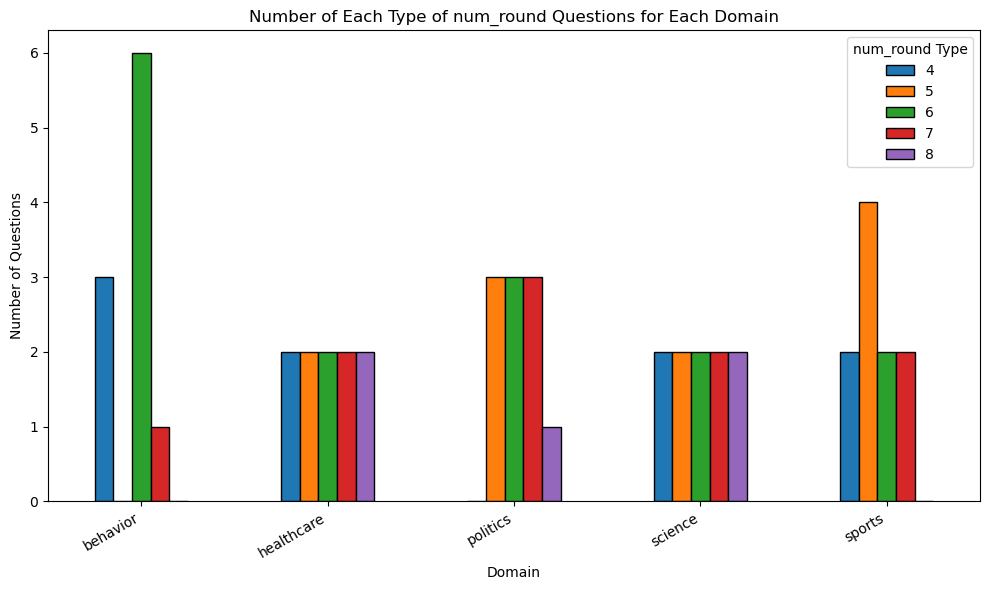

In [11]:
# for all domains
plot_rounds_by_domain(df)

In [12]:
df[df["domain"] == "science"].groupby("scenario").count()["round"]

scenario
0    6
1    7
2    7
3    8
4    5
5    6
6    5
7    4
8    4
9    8
Name: round, dtype: int64